In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats as stats

import warnings
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
import networkx as nx
warnings.filterwarnings("ignore")
from dowhy import CausalModel
import dowhy.datasets


In [25]:
np.random.seed(42)
num_samples = 10000


days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Offer = np.array([1, 1.1 , 1.5 , 1.9, 2.1])
day_data_with_offer = []
beer_sale_data_with_offer = []
beer_pr_sale_data_with_offer = []
number_of_sales_data_with_offer = []
customers_data_with_offer = []

for i,day in enumerate(days_of_week):
    if day == 'Monday':
        customers = np.random.randint(50, 100, num_samples)
    elif day == 'Tuesday':
        customers = np.random.randint(80, 150, num_samples)
    elif day == 'Wednesday':
        customers = np.random.randint(150, 300, num_samples)
    elif day == 'Thursday':
        customers = np.random.randint(300, 600, num_samples)
    elif day == 'Friday':
        customers = np.random.randint(600, 1200, num_samples)
    
    # Extend the customers_data list
    

    beer_pr_sale = np.random.normal(2, 1, num_samples) * Offer[i] + np.random.normal(0,0.5, num_samples)

    number_of_sales = customers - customers*(0.1)* beer_pr_sale - Offer[i]*0.1 + np.random.normal(0,10, num_samples)

    beer_sale_tot = beer_pr_sale * number_of_sales 

    mask_tot  = beer_sale_tot > 0
    
    beer_sale_tot = beer_sale_tot[mask_tot]
    beer_pr_sale = beer_pr_sale[mask_tot]
    number_of_sales = number_of_sales[mask_tot]
    customers = customers[mask_tot]

    day_data_with_offer.extend([day] * len(beer_sale_tot))

    beer_sale_data_with_offer.extend(beer_sale_tot)
    beer_pr_sale_data_with_offer.extend(beer_pr_sale)
    number_of_sales_data_with_offer.extend(number_of_sales)
    customers_data_with_offer.extend(customers)

#Convert to pandas dataframe
offer_given = np.random.choice([1], size=len(day_data_with_offer))
data1 = {
    'Day': day_data_with_offer,
    'Customers': customers_data_with_offer,
    'Total_sale': beer_sale_data_with_offer,
    'Beer_pr_sale': beer_pr_sale_data_with_offer,
    'Number_of_Sales': number_of_sales_data_with_offer,
    'Offer': offer_given
}
df1 = pd.DataFrame(data1)

    




In [26]:
np.random.seed(42)
num_samples = 10000

#day = np.array([1,1.3,1.8,2,2.5])
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


day_data = []
beer_sale_data = []
beer_pr_sale_data = []
number_of_sales_data = []
customers_data = []
for i,day in enumerate(days_of_week):
    if day == 'Monday':
        customers = np.random.randint(50, 100, num_samples)
    elif day == 'Tuesday':
        customers = np.random.randint(80, 150, num_samples)
    elif day == 'Wednesday':
        customers = np.random.randint(150, 300, num_samples)
    elif day == 'Thursday':
        customers = np.random.randint(300, 600, num_samples)
    elif day == 'Friday':
        customers = np.random.randint(600, 1200, num_samples)
    
    # Extend the customers_data list
    
    beer_pr_sale = np.random.normal(2, 1, num_samples) +  np.random.normal(0,0.5, num_samples)

    number_of_sales = customers - customers*(0.1)* beer_pr_sale + np.random.normal(0,10, num_samples)

    beer_sale_tot = beer_pr_sale * number_of_sales + np.random.normal(0, 1, num_samples)
    

    mask_tot  = beer_sale_tot > 0
    
    beer_sale_tot = beer_sale_tot[mask_tot]
    beer_pr_sale = beer_pr_sale[mask_tot]
    number_of_sales = number_of_sales[mask_tot]
    customers = customers[mask_tot]
    day_data.extend([day] * len(beer_sale_tot))

    beer_sale_data.extend(beer_sale_tot)
    beer_pr_sale_data.extend(beer_pr_sale)
    number_of_sales_data.extend(number_of_sales)
    customers_data.extend(customers)
    
#Convert to pandas dataframe
offer_given = np.random.choice([0], size=len(day_data))
print(offer_given)
data = {
    'Day': day_data,
    'Customers' : customers_data,
    'Total_sale': beer_sale_data,
    'Beer_pr_sale': beer_pr_sale_data,
    'Number_of_Sales': number_of_sales_data,
    'Offer': offer_given
}
df = pd.DataFrame(data)

# Display the DataFrame

    

combined_df = pd.concat([df, df1],ignore_index=True)
print(combined_df)

[0 0 0 ... 0 0 0]
          Day  Customers   Total_sale  Beer_pr_sale  Number_of_Sales  Offer
0      Monday         88    87.644119      1.192739        74.260875      0
1      Monday         78   179.749840      3.557992        51.002640      0
2      Monday         64    93.078795      1.436300        65.021311      0
3      Monday         92   234.689345      3.307770        70.680648      0
4      Monday         57    42.269076      0.894257        46.401802      0
...       ...        ...          ...           ...              ...    ...
96583  Friday        978  1828.358248      2.414486       757.245402      1
96584  Friday        947  2341.016427      5.338910       438.482058      1
96585  Friday        972  2175.626298      3.474341       626.198277      1
96586  Friday        912  2206.263128      4.249631       519.165756      1
96587  Friday        715  1146.091679      8.066750       142.076018      1

[96588 rows x 6 columns]


In [27]:

model = CausalModel(
    data=combined_df,
    treatment='Offer',
    outcome='Total_sale',
      graph="""digraph {
        Day -> Offer;
        Offer -> Beer_pr_sale;
        Offer -> Number_of_Sales;
        Beer_pr_sale -> Number_of_Sales;
        Beer_pr_sale -> Total_sale;
        Number_of_Sales -> Total_sale;
        Day -> Customers;
        Customers -> Total_sale;
        Customers -> Number_of_Sales;
        }"""
)












In [28]:
identified_estimand = model.identify_effect()

estimate = model.estimate_effect(identified_estimand,
                                 confidence_intervals=False,
                                 method_name="backdoor.linear_regression")



estimate3 = model.estimate_effect(identified_estimand, 
                                 method_name="backdoor.propensity_score_matching")

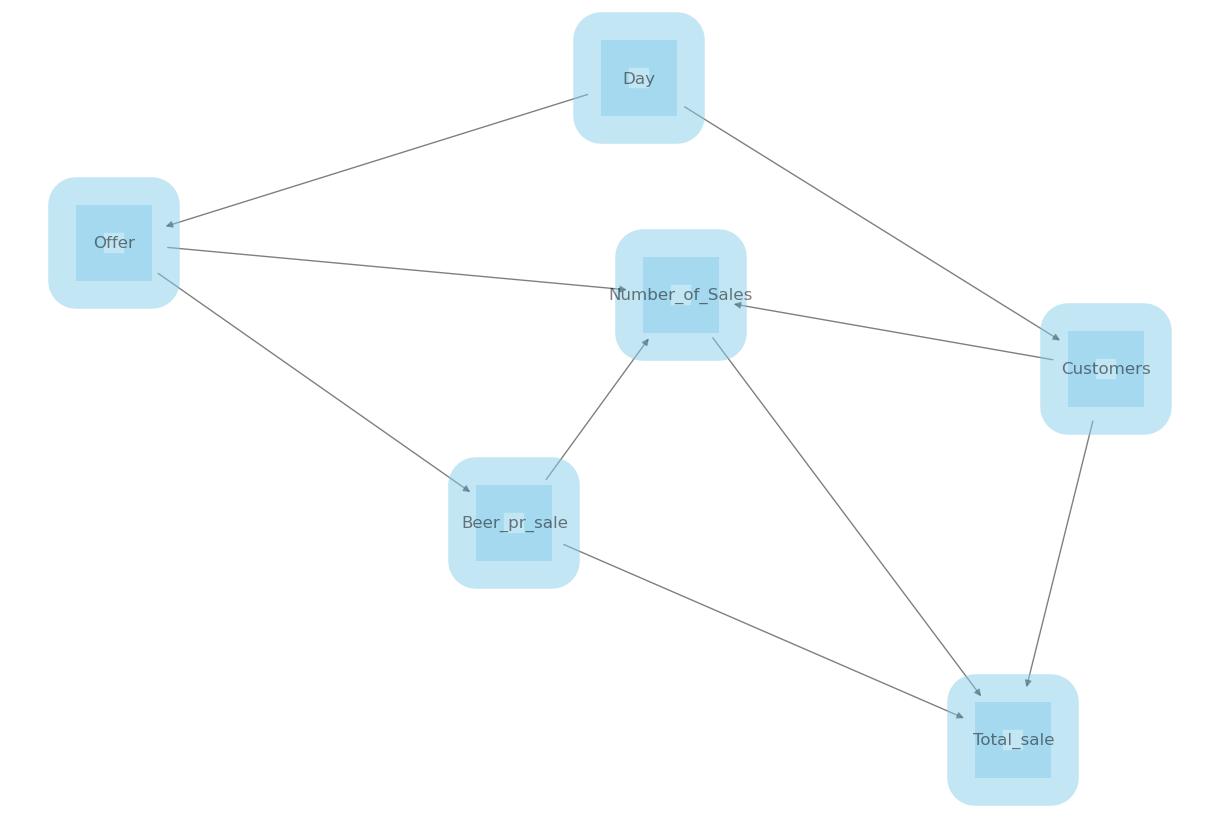

In [29]:
import networkx as nx

# Create an empty directed graph
graph = nx.DiGraph()

# Add nodes to the graph
graph.add_nodes_from(['Day', 'Offer', 'Beer_pr_sale', 'Number_of_Sales', 'Total_sale', 'Customers'])

# Add edges to the graph
graph.add_edges_from([('Day', 'Offer'), ('Offer', 'Beer_pr_sale'), ('Offer', 'Number_of_Sales'),
                      ('Beer_pr_sale', 'Number_of_Sales'), ('Beer_pr_sale', 'Total_sale'),
                      ('Number_of_Sales', 'Total_sale'), ('Day', 'Customers'), ('Customers', 'Total_sale'),
                      ('Customers', 'Number_of_Sales')])

# Print the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
plt.show()

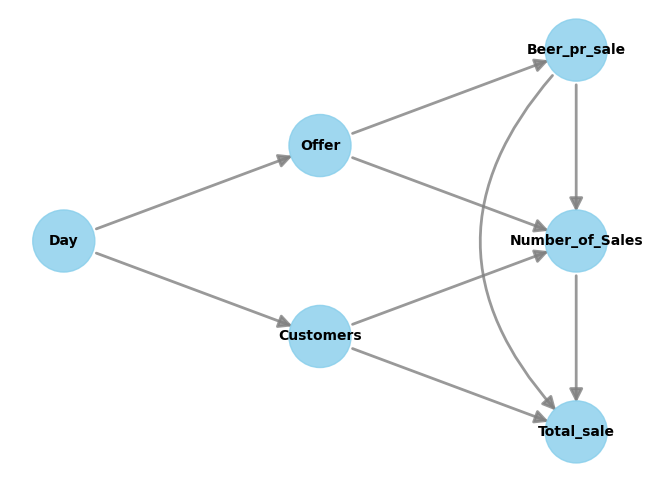

In [30]:
model.view_model()

Now we want to extend the analisys to a bit more complicated causal graph. The offer is binary, either on or off. The strength of the offer depends on the day. So if it is friday people are more likely to buy the offer of 5 for 6 beers.  The day also influence the number of customers arriving in the bar. The day is thus a confounding variable. The data is generated such that every arrow is linear, except that the two arrows Number of sales and total sale which are multiplied. These are the equation that generate the data, where $\mathcal{N}$ is random nummer

\begin{align*}
\text{customers} & \sim \text{Uniform}(600, 1200) \\
\text{beer\_pr\_sale} & \sim \mathcal{N}(2 \times \text{Offer}[i], 1) + \mathcal{N}(0, 0.5) \\
\text{number\_of\_sales} & = \text{customers} - \text{customers} \times 0.1 \times \text{beer\_pr\_sale} - \text{Offer}[i] \times 0.1 + \mathcal{N}(0, 10) \\
\text{beer\_sale\_tot} & = \text{beer\_pr\_sale} \times \text{number\_of\_sales}
\end{align*}


In [31]:
df2 = combined_df
df2['Offer'] = np.random.choice([0,1], size=len(combined_df['Offer']))

In [32]:
# Creating a causal model
model1 = CausalModel(
    data=df2,
    treatment='Offer',
    outcome='Total_sale',
      graph="""digraph {
        Day -> Offer;
        Offer -> Beer_pr_sale;
        Offer -> Number_of_Sales;
        Beer_pr_sale -> Number_of_Sales;
        Beer_pr_sale -> Total_sale;
        Number_of_Sales -> Total_sale;
        Day -> Customers;
        Customers -> Total_sale;
        Customers -> Number_of_Sales;
        }"""
)

# Identify the causal effect
identified_estimand = model1.identify_effect()
#print(identified_estimand)
#Estimate the causal effect


In [33]:
estimate = model.estimate_effect(identified_estimand,
                                 confidence_intervals=False,
                                 method_name="backdoor.linear_regression")

estimate3 = model.estimate_effect(identified_estimand, 
                                 method_name="backdoor.propensity_score_matching")

In [34]:
from dowhy.gcm import falsify
a=falsify.validate_lmc(graph , combined_df)
b = falsify.validate_lmc(graph , df2)

In [ ]:
print(a)
print(b)

In [36]:
c=falsify.falsify_graph(graph , combined_df)


Test permutations of given graph: 100%|██████████| 20/20 [16:07<00:00, 48.37s/it]


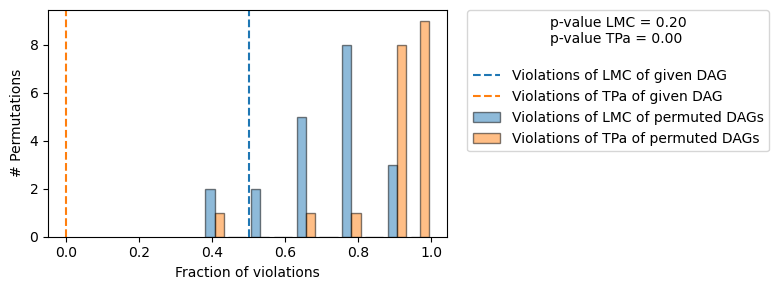

In [37]:
falsify.plot_evaluation_results(c)

In [41]:
c

+-------------------------------------------------------------------------------------------------------+
|                                         Falsificaton Summary                                          |
+-------------------------------------------------------------------------------------------------------+
| The given DAG is informative because 0 / 20 of the permutations lie in the Markov                     |
| equivalence class of the given DAG (p-value: 0.00).                                                   |
| The given DAG violates 4/8 LMCs and is better than 80.0% of the permuted DAGs (p-value: 0.20).        |
| Based on the provided significance level (0.05) and because the DAG is informative,                   |
| we reject the DAG.                                                                                    |
+-------------------------------------------------------------------------------------------------------+